Required libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Uploading file from local

In [ ]:
from google.colab import files
upload=files.upload()

Saving AUDUSD.csv to AUDUSD.csv


In [ ]:
AUDUSD=pd.read_csv('/content/AUDUSD.csv')

In [ ]:
data=AUDUSD

Top five view of data-points

In [ ]:
data.head()

,Time (UTC),Open,High,Low,Close,Volume
0,2010.01.01 02:00:00,0.89748,0.89759,0.89741,0.89747,7951.85
1,2010.01.01 06:00:00,0.89747,0.89763,0.89739,0.89754,18505.45
2,2010.01.01 10:00:00,0.89755,0.89763,0.89746,0.89750,15265.53
3,2010.01.01 14:00:00,0.89753,0.89769,0.89746,0.89753,16587.97
4,2010.01.01 18:00:00,0.89755,0.89765,0.89738,0.89738,7615.19


Bottom five value

In [ ]:
data.tail()

,Time (UTC),Open,High,Low,Close,Volume
15895,2020.03.12 05:00:00,0.64578,0.64638,0.64352,0.64362,31186.71
15896,2020.03.12 09:00:00,0.64362,0.64365,0.63481,0.63487,36624.52
15897,2020.03.12 13:00:00,0.63487,0.63678,0.62669,0.63544,72771.41
15898,2020.03.12 17:00:00,0.63543,0.63866,0.62136,0.62377,55018.52
15899,2020.03.12 21:00:00,0.62378,0.63186,0.62336,0.62899,27747.49


Number of colmns

In [ ]:
data.columns

Index(['Time (UTC)', 'Open', 'High', 'Low', 'Close', 'Volume '], dtype='object')

Droping less important value

In [ ]:
data.drop(["Time (UTC)"],axis=1,inplace=True)
data.drop(['Volume '],axis=1,inplace=True)

In [ ]:
data[0:2]

,Open,High,Low,Close
0,0.89748,0.89759,0.89741,0.89747
1,0.89747,0.89763,0.89739,0.89754


Shifting target value to last column

In [ ]:
col_name='High'
last_col = data.pop(col_name)
data.insert(3, col_name, last_col)

Our new dataset

In [ ]:
data.head()

,Open,Low,Close,High
0,0.89748,0.89741,0.89747,0.89759
1,0.89747,0.89739,0.89754,0.89763
2,0.89755,0.89746,0.89750,0.89763
3,0.89753,0.89746,0.89753,0.89769
4,0.89755,0.89738,0.89738,0.89765


Converting datafreame into vector array

In [ ]:
cols=[]
rows=[]

for i in range(data.shape[1]):
    for j in range(data.shape[0]):
        rows.append(data[data.columns[i]][j])
    cols.append(rows)
    rows=[]
    
print(np.array(cols).T)

[[0.89748 0.89741 0.89747 0.89759]
 [0.89747 0.89739 0.89754 0.89763]
 [0.89755 0.89746 0.8975  0.89763]
 ...
 [0.63487 0.62669 0.63544 0.63678]
 [0.63543 0.62136 0.62377 0.63866]
 [0.62378 0.62336 0.62899 0.63186]]


 split a multivariate sequence into samples

In [ ]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


 choose a number of time steps

In [ ]:
n_steps = 3

convert into input/output

In [ ]:
data_X, data_y = split_sequences(np.array(cols).T, n_steps)

summarize the data

In [ ]:
for i in range(len(data_X)):
    print(data_X[i], data_y[i])

Streaming output truncated to the last 5000 lines.
 [0.71255 0.71253 0.71445]] 0.7149
[[0.71129 0.71113 0.71255]
 [0.71255 0.71253 0.71445]
 [0.71379 0.71358 0.71527]] 0.71546
[[0.71255 0.71253 0.71445]
 [0.71379 0.71358 0.71527]
 [0.71527 0.71455 0.71471]] 0.71597
[[0.71379 0.71358 0.71527]
 [0.71527 0.71455 0.71471]
 [0.71471 0.71423 0.7152 ]] 0.7157399999999999
[[0.71527 0.71455 0.71471]
 [0.71471 0.71423 0.7152 ]
 [0.71519 0.71512 0.71566]] 0.71612
[[0.71471 0.71423 0.7152 ]
 [0.71519 0.71512 0.71566]
 [0.71566 0.71251 0.71301]] 0.7161
[[0.71519 0.71512 0.71566]
 [0.71566 0.71251 0.71301]
 [0.71298 0.71286 0.71314]] 0.7134699999999999
[[0.71566 0.71251 0.71301]
 [0.71298 0.71286 0.71314]
 [0.71325 0.71153 0.7126 ]] 0.7145
[[0.71298 0.71286 0.71314]
 [0.71325 0.71153 0.7126 ]
 [0.71259 0.71079 0.71162]] 0.71259
[[0.71325 0.71153 0.7126 ]
 [0.71259 0.71079 0.71162]
 [0.71162 0.71068 0.71097]] 0.7124
[[0.71259 0.71079 0.71162]
 [0.71162 0.71068 0.71097]
 [0.71097 0.71041 0.71132]] 0.7

In [ ]:
data_X

array([[[0.89748, 0.89741, 0.89747],
        [0.89747, 0.89739, 0.89754],
        [0.89755, 0.89746, 0.8975 ]],

       [[0.89747, 0.89739, 0.89754],
        [0.89755, 0.89746, 0.8975 ],
        [0.89753, 0.89746, 0.89753]],

       [[0.89755, 0.89746, 0.8975 ],
        [0.89753, 0.89746, 0.89753],
        [0.89755, 0.89738, 0.89738]],

       ...,

       [[0.64578, 0.64352, 0.64362],
        [0.64362, 0.63481, 0.63487],
        [0.63487, 0.62669, 0.63544]],

       [[0.64362, 0.63481, 0.63487],
        [0.63487, 0.62669, 0.63544],
        [0.63543, 0.62136, 0.62377]],

       [[0.63487, 0.62669, 0.63544],
        [0.63543, 0.62136, 0.62377],
        [0.62378, 0.62336, 0.62899]]])

Printing shape of data

In [ ]:
print(data_X.shape, data_y.shape)

(15898, 3, 3) (15898,)


Number of features

In [ ]:
n_features = data_X.shape[2]
n_features

3

Splitting the dataset into train and test:

80% for train and 20% for test. As it is time series data we can't do random split and train.


In [ ]:
train_size=int(data_X.shape[0]*0.8)
test_size=data_X.shape[0]-train_size

print('Train size=',train_size)
print('Test size=',test_size)

Train size= 12718
Test size= 3180


In [ ]:
train_X=data_X[0:train_size,]

train_y=data_y[0:train_size,]

print('Train_X data=','\n',train_X[0:10],'\n'
      '-----------------------------------------------------------------------'
      '\n','Train_y data=','\n',train_y[0:10])

Train_X data= 
 [[[0.89748 0.89741 0.89747]
  [0.89747 0.89739 0.89754]
  [0.89755 0.89746 0.8975 ]]

 [[0.89747 0.89739 0.89754]
  [0.89755 0.89746 0.8975 ]
  [0.89753 0.89746 0.89753]]

 [[0.89755 0.89746 0.8975 ]
  [0.89753 0.89746 0.89753]
  [0.89755 0.89738 0.89738]]

 [[0.89753 0.89746 0.89753]
  [0.89755 0.89738 0.89738]
  [0.89847 0.89397 0.89524]]

 [[0.89755 0.89738 0.89738]
  [0.89847 0.89397 0.89524]
  [0.8952  0.89504 0.89794]]

 [[0.89847 0.89397 0.89524]
  [0.8952  0.89504 0.89794]
  [0.89789 0.89687 0.90557]]

 [[0.8952  0.89504 0.89794]
  [0.89789 0.89687 0.90557]
  [0.90554 0.90429 0.90819]]

 [[0.89789 0.89687 0.90557]
  [0.90554 0.90429 0.90819]
  [0.90823 0.90779 0.91224]]

 [[0.90554 0.90429 0.90819]
  [0.90823 0.90779 0.91224]
  [0.91229 0.91133 0.91288]]

 [[0.90823 0.90779 0.91224]
  [0.91229 0.91133 0.91288]
  [0.91275 0.91179 0.91324]]] 
-----------------------------------------------------------------------
 Train_y data= 
 [0.89763 0.89769 0.89765 0.90001 0

In [ ]:
test_X=data_X[train_size:data_X.shape[0],]

test_y=data_y[train_size:data_y.shape[0],]

print('Test_X','\n',test_X,'\n',
     '------------------------------------------------------------------------------',
     '\n','Test_y','\n',test_y)

Test_X 
 [[[0.78474 0.78434 0.7856 ]
  [0.78562 0.78465 0.78616]
  [0.78615 0.78405 0.78473]]

 [[0.78562 0.78465 0.78616]
  [0.78615 0.78405 0.78473]
  [0.78473 0.7837  0.78406]]

 [[0.78615 0.78405 0.78473]
  [0.78473 0.7837  0.78406]
  [0.78405 0.78206 0.7833 ]]

 ...

 [[0.64578 0.64352 0.64362]
  [0.64362 0.63481 0.63487]
  [0.63487 0.62669 0.63544]]

 [[0.64362 0.63481 0.63487]
  [0.63487 0.62669 0.63544]
  [0.63543 0.62136 0.62377]]

 [[0.63487 0.62669 0.63544]
  [0.63543 0.62136 0.62377]
  [0.62378 0.62336 0.62899]]] 
 ------------------------------------------------------------------------------ 
 Test_y 
 [0.78656 0.78553 0.78472 ... 0.63678 0.63866 0.63186]


**Stacked based LSTM Autoencoder splitted into different blocks**

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM,Dense,TimeDistributed,Input,RepeatVector

encoder_input_1=Input(shape=(n_steps,n_features))

#First Autoencoder block
encoder_lstm_1=LSTM(50)(encoder_input_1)
learning_vector_1=RepeatVector(n_steps)(encoder_lstm_1)
decoder_lstm_1=LSTM(n_steps,return_sequences=True)(learning_vector_1)

#Second Autoecoder block

encoder_lstm_2=LSTM(50)(decoder_lstm_1)
learning_vector_2=RepeatVector(n_steps)(encoder_lstm_2)
decoder_lstm_2=LSTM(n_steps,return_sequences=True)(learning_vector_2)

#Third Autoecoder block

encoder_lstm_3=LSTM(50)(decoder_lstm_2)
learning_vector_3=RepeatVector(n_steps)(encoder_lstm_3)
decoder_lstm_3=LSTM(n_steps)(learning_vector_3)

decoder_time=Dense(1)(decoder_lstm_3)
model=Model(encoder_input_1,decoder_time)
model.summary()

model.compile(loss='mse',optimizer='adam')
#model.fit(train_X,train_y,batch_size=30,epochs=10)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 3)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                10800     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 3, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 3)              648       
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                10800     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 3)              648   

In [ ]:
model.fit(train_X,train_y,batch_size=30,epochs=10)

Epoch 1/10
424/424 [==============================] - 6s 14ms/step - loss: 0.0571
Epoch 2/10
424/424 [==============================] - 6s 14ms/step - loss: 2.7225e-05
Epoch 3/10
424/424 [==============================] - 6s 13ms/step - loss: 2.0921e-05
Epoch 4/10
424/424 [==============================] - 6s 14ms/step - loss: 1.4761e-05
Epoch 5/10
424/424 [==============================] - 6s 13ms/step - loss: 1.3578e-05
Epoch 6/10
424/424 [==============================] - 6s 14ms/step - loss: 1.1281e-05
Epoch 7/10
424/424 [==============================] - 6s 13ms/step - loss: 1.0949e-05
Epoch 8/10
424/424 [==============================] - 6s 13ms/step - loss: 1.3134e-05
Epoch 9/10
424/424 [==============================] - 6s 13ms/step - loss: 1.0729e-05
Epoch 10/10
424/424 [==============================] - 6s 13ms/step - loss: 1.2067e-05


**Note:** We can use n-number of blocks for time being I used only three. Anyone can choose more than three stack LSTM autoencoder block.

Making prediction on test set

In [ ]:
prediction=model.predict(test_X)
prediction

array([[0.7910585 ],
       [0.7907047 ],
       [0.7898834 ],
       ...,
       [0.65165645],
       [0.64661115],
       [0.64360505]], dtype=float32)

In [ ]:
prediction.shape

(3180, 1)

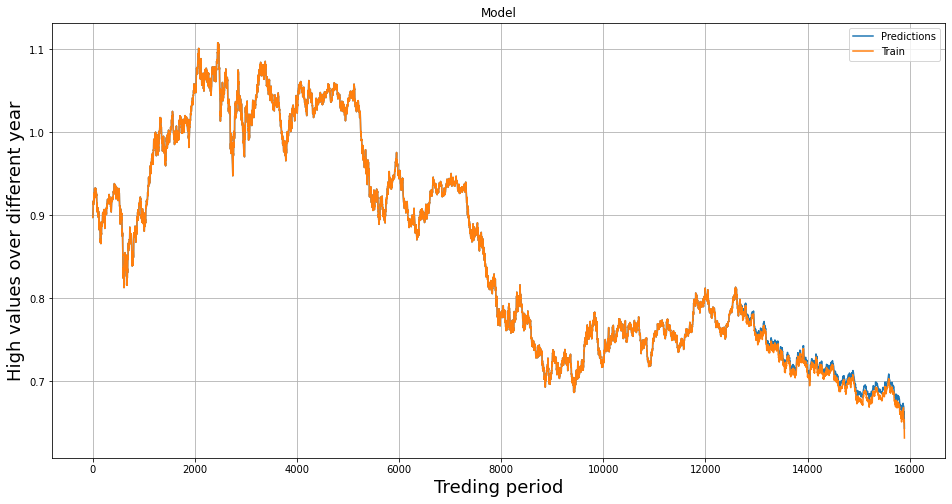

In [ ]:
#Plot/Create the data for the graph
train = data_y.copy()
train[train_size:data_y.shape[0],]=prediction.ravel()
plt.figure(figsize=(16,8))

plt.title('Model')
plt.xlabel('Treding period', fontsize=18)
plt.ylabel('High values over different year', fontsize=18)
plt.plot(train)
plt.plot(data_y)
plt.legend(['Predictions','Train'], loc='upper right')
plt.grid()
plt.show()

Let's zoom on performance over test data:

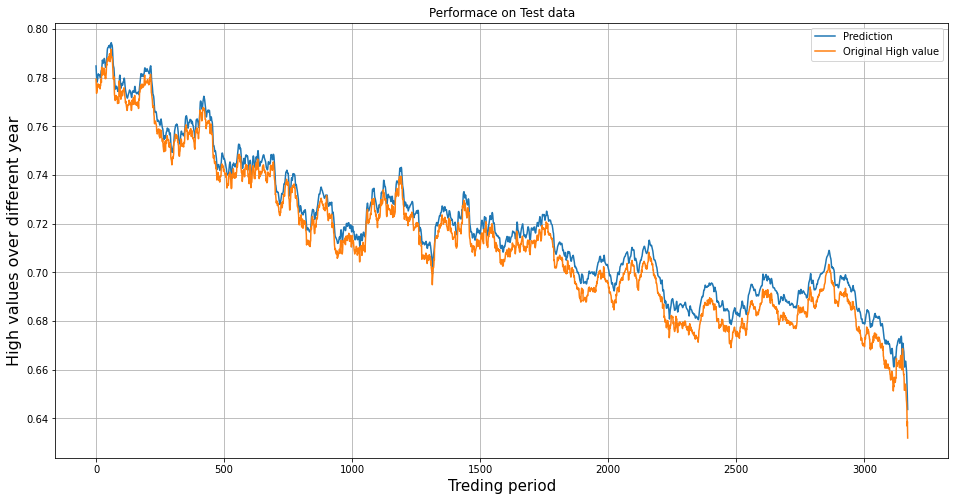

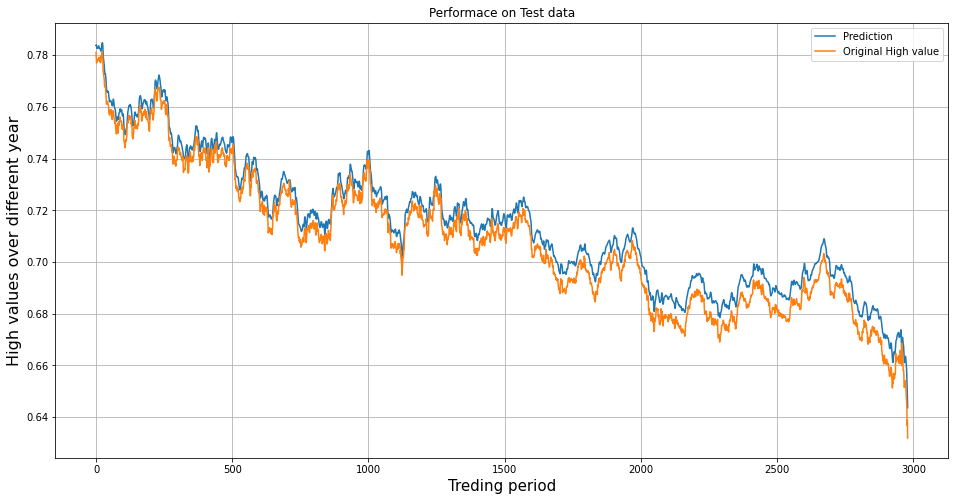

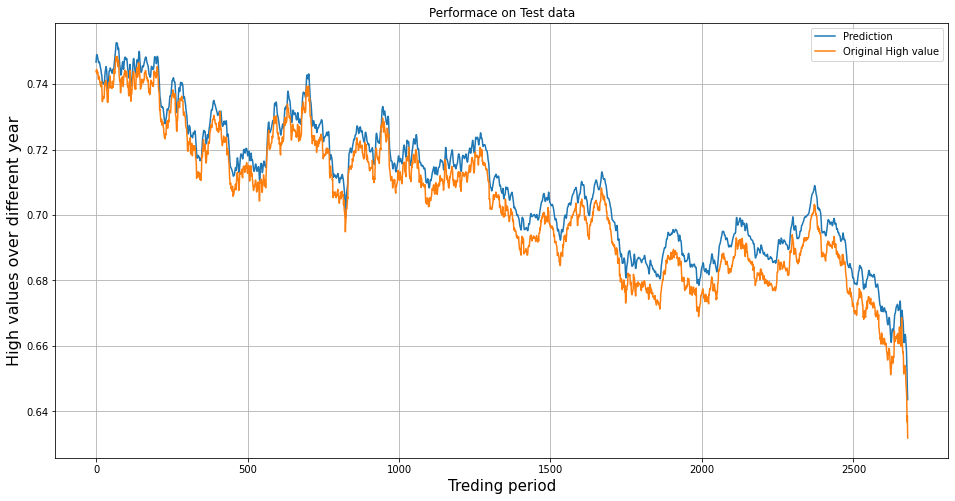

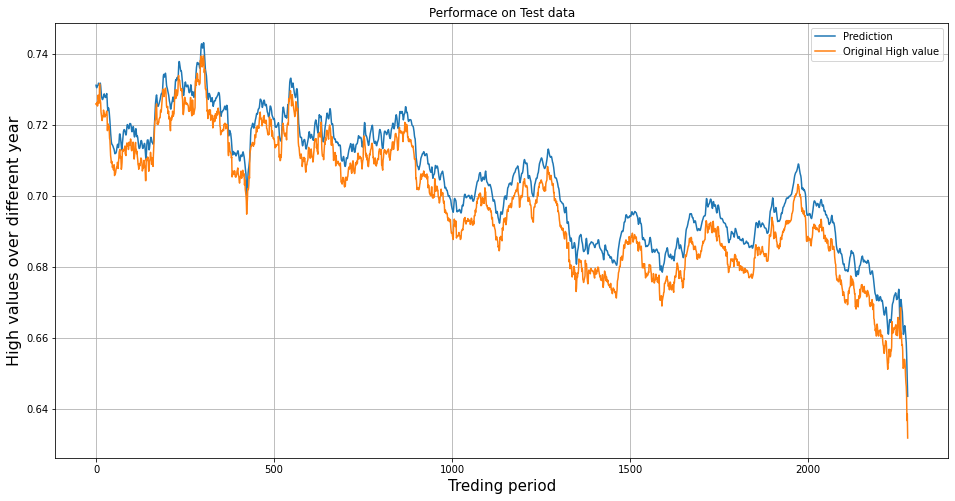

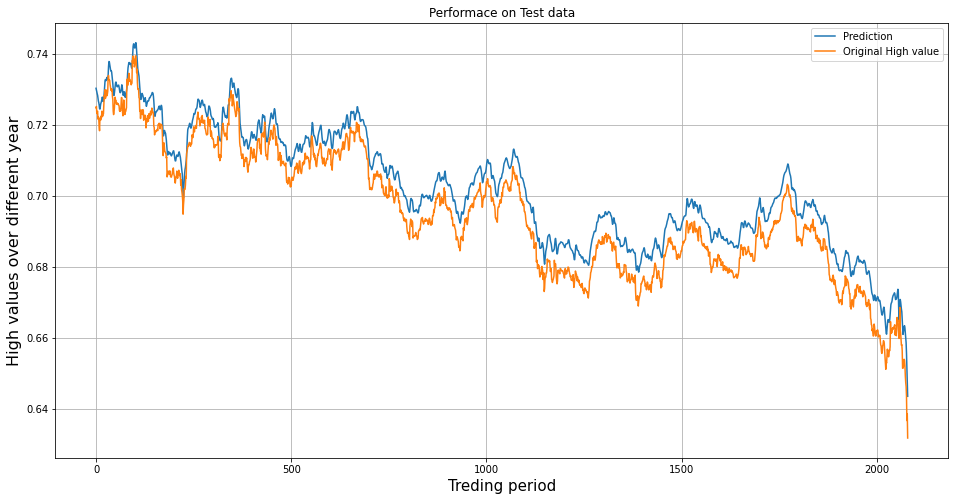

In [ ]:
for i in [10,200,500,900,1100]:
    plt.figure(figsize=(16,8))
    plt.plot(train[train_size+i:len(data_y)])
    plt.plot(data_y[train_size+i:len(data_y)])
    plt.title('Performace on Test data')
    plt.xlabel('Treding period',fontsize=15)
    plt.ylabel('High values over different year',fontsize=16)
    plt.grid()
    plt.legend(['Prediction','Original High value'])
    plt.show()



Calculate the Metrics :

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


RMSE=np.sqrt(np.mean(((prediction- test_y)**2)))

SMAPE=(np.sum(2*np.abs(prediction- test_y)/((np.abs(prediction)+ np.abs(test_y))))*100)/len(test_y)


print('MSE:',mean_squared_error(prediction,test_y))
print('MAE:',mean_absolute_error(prediction,test_y))
print('RMSE:',RMSE)
print('SMAPE:',SMAPE)
print('MAPE:',mape(test_y,prediction ))


MSE: 3.645965972758471e-05
MAE: 0.005778890342778379
RMSE: 0.04260985222896513
SMAPE: 15025.267126029286
MAPE: 4.771221030936113


# Conclusion:


1.Our MAE value is not too much bad as we can upto two decimal places it can predict well.

2.If we see in above graph then we can find it works well on some data-points and in some data-points it is little far but approaching to actual one.

3.As in paper suggested including more blocks and playing with some drop-out layer with different unit size may help.